In [41]:
import pandas as pd


In [51]:
df_Morr=pd.read_csv('../Data/Trust Pilot Extraction/dataMorrisons.csv', sep='\t', header=None)
df_Asda=pd.read_csv('../Data/Trust Pilot Extraction/dataAsda.csv', sep='\t', header=None)
df_Sains=pd.read_csv('../Data/Trust Pilot Extraction/dataSainsburys.csv', sep='\t', header=None)
df_Tesco=pd.read_csv('../Data/Trust Pilot Extraction/dataTesco.csv', sep='\t', header=None)

In [52]:
df_Morr.columns=['title', 'review', 'rating', 'language','date & time']
df_Asda.columns=['title', 'review', 'rating', 'language','date & time']
df_Sains.columns=['title', 'review', 'rating', 'language','date & time']
df_Tesco.columns=['title', 'review', 'rating', 'language','date & time']

df_Morr['Company']='Morrisons'
df_Asda['Company']='Asda'
df_Sains['Company']='Sainsburys'
df_Tesco['Company']='Tesco'

frames=[df_Morr, df_Asda, df_Sains, df_Tesco]
df=pd.concat(frames, axis=0)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7057 entries, 0 to 2597
Data columns (total 6 columns):
title          7057 non-null object
review         7057 non-null object
rating         7057 non-null int64
language       7057 non-null object
date & time    7057 non-null object
Company        7057 non-null object
dtypes: int64(1), object(5)
memory usage: 385.9+ KB


In [54]:
# extract date from datetime
df['date']=df['date & time'].map(lambda x: x[:10])
df=df.drop({'date & time','language'},1)
df['date'] = pd.to_datetime(df['date'])  
df=df.drop_duplicates(subset='review')
df.head()

,title,review,rating,Company,date
0,I returned a product to Morrisons …,I returned a product to Morrisons Eastbourne s...,5,Morrisons,2017-07-09
1,Can we have some answers please????,Can we have some answers please????? Every sin...,1,Morrisons,2017-07-09
2,Random letter has put me off Morrisons.,Did you know that if you over stay in a Morris...,1,Morrisons,2017-07-07
3,"Morrisons Yeovil,","Morrisons Yeovil,Complained to store manager o...",1,Morrisons,2017-07-07
4,What's the point of 'Express …,What's the point of 'Express Checkouts' at my...,2,Morrisons,2017-07-07


# Visualisation

In [55]:
import numpy as np
import datetime

In [56]:
df['date']=pd.to_datetime(df['date']) # convert to date time
df.index=df['date'] # set as index

df_Morr=df.loc[df['Company']=='Morrisons']
df_Asda=df.loc[df['Company']=='Asda']
df_Sains=df.loc[df['Company']=='Sainsburys']
df_Tesco=df.loc[df['Company']=='Tesco']

df_Morr=df_Morr.resample('q').mean()
df_Asda=df_Asda.resample('q').mean()
df_Sains=df_Sains.resample('q').mean()
df_Tesco=df_Tesco.resample('q').mean()

In [57]:
import matplotlib.pyplot as plt
% matplotlib inline

In [58]:
mask = (df_Morr.index >= '2011-01-01')
df_Morr=df_Morr.loc[mask]
df_Asda=df_Asda.loc[mask]
df_Sains=df_Sains.loc[mask]
df_Tesco=df_Tesco.loc[mask]




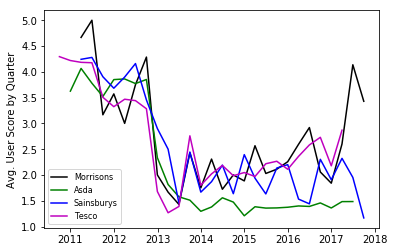

In [59]:
plt.plot(df_Morr.index, df_Morr.rating,'k',label='Morrisons')
plt.plot(df_Asda.index, df_Asda.rating,'g',label='Asda')
plt.plot(df_Sains.index, df_Sains.rating,'b',label='Sainsburys')
plt.plot(df_Tesco.index, df_Tesco.rating,'m',label='Tesco')

plt.ylabel('Avg. User Score by Quarter')
plt.legend(loc='best',prop={'size':8})

# Sentiment analysis

In [60]:
from textblob import TextBlob

In [61]:
def sentiment_score(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None
    
df['sentiment']=df['review'].apply(sentiment_score)

In [62]:
new_col_list = ['sentiment score ','subjectivity']
for n,col in enumerate(new_col_list):
    df[col] = df['sentiment'].apply(lambda location: location[n])
df=df.drop('sentiment', axis=1)

In [63]:
df.head()

,title,review,rating,Company,date,sentiment score,subjectivity
date,,,,,,,
2017-07-09,I returned a product to Morrisons …,I returned a product to Morrisons Eastbourne s...,5,Morrisons,2017-07-09,-0.023333,0.243333
2017-07-09,Can we have some answers please????,Can we have some answers please????? Every sin...,1,Morrisons,2017-07-09,-0.054945,0.416636
2017-07-07,Random letter has put me off Morrisons.,Did you know that if you over stay in a Morris...,1,Morrisons,2017-07-07,0.142857,0.467857
2017-07-07,"Morrisons Yeovil,","Morrisons Yeovil,Complained to store manager o...",1,Morrisons,2017-07-07,-0.361111,0.561111
2017-07-07,What's the point of 'Express …,What's the point of 'Express Checkouts' at my...,2,Morrisons,2017-07-07,0.112500,0.333333


In [64]:
df_sentiment=df.filter(['sentiment score '], axis=1)

In [65]:
df_Morr_sentiment=df_sentiment.loc[df['Company']=='Morrisons']
df_Asda_sentiment=df_sentiment.loc[df['Company']=='Asda']
df_Sains_sentiment=df_sentiment.loc[df['Company']=='Sainsburys']
df_Tesco_sentiment=df_sentiment.loc[df['Company']=='Tesco']

In [66]:
df_Morr_sentiment=df_Morr_sentiment.resample('q').mean()
df_Asda_sentiment=df_Asda_sentiment.resample('q').mean()
df_Sains_sentiment=df_Sains_sentiment.resample('q').mean()
df_Tesco_sentiment=df_sentiment.resample('q').mean()
df_Morr_sentiment.head()

,sentiment score
date,
2009-06-30,-0.4
2009-09-30,NaN
2009-12-31,NaN
2010-03-31,NaN
2010-06-30,NaN


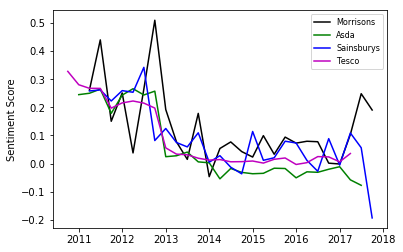

In [67]:
mask = (df_Morr_sentiment.index >= '2011-01-01')
df_Morr_sentiment=df_Morr_sentiment.loc[mask]
df_Asda_sentiment=df_Asda_sentiment.loc[mask]
df_Sains_sentiment=df_Sains_sentiment.loc[mask]
df_Tesco_sentiment=df_Tesco_sentiment.loc[mask]


x=df_Morr_sentiment.index
y=df_Morr_sentiment['sentiment score ']

plt.plot(df_Morr_sentiment.index,df_Morr_sentiment['sentiment score '],'k',label='Morrisons')
plt.plot(df_Asda_sentiment.index, df_Asda_sentiment['sentiment score '],'g',label='Asda')
plt.plot(df_Sains_sentiment.index, df_Sains_sentiment['sentiment score '],'b',label='Sainsburys')
plt.plot(df_Tesco_sentiment.index, df_Tesco_sentiment['sentiment score '],'m',label='Tesco')

plt.ylabel('Sentiment Score')
plt.legend(loc='best',prop={'size':8})